In [1]:
import pandas as pd
import numpy as np
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sunidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('cleaned_dataset(range).csv')
df

,Unnamed: 0,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
0,3,Technical Support,Technical Support,Mumbai,"Admin,Maintenance,Security,Datawarehousing,IT ...",1 - 5,1 - 5
1,6,Sales- Fresher-for Leading Property Consultant,"channel partners, real estate, negotiation, p...",Bengaluru,"Retail Sales,Sales , Retail , Business Develop...",1 - 5,1 - 5
2,14,"Looking Facebook ,social Media Manager For ou...","digital marketing, seo, social media marketin...",Gurgaon,"Online,Digital Marketing,Marketing , Advertisi...",1 - 5,1 - 5
3,21,"Business Development , Corporate Sales","lead generation, business development, corpor...",Delhi NCR,"Retail Sales,Sales , Retail , Business Develop...",1 - 5,1 - 5
4,23,QA Executive,QA Executive,Hyderabad,"QA,Testing,Documentation,IT Software - QA & Te...",1 - 5,1 - 5
...,...,...,...,...,...,...,...
6766,392,"VP , Sr.vp Fire","Fire Safety, fire, Senior Management",Delhi NCR,"Safety,Health,Environment,Production , Manufac...",20 - 25,50 - 100
6767,4917,Vice President - Marketing Startegies,"Life Cycle, Portfolio Management, New Product...",Mumbai,"Senior Management,Marketing , Advertising , MR...",20 - 25,50 - 100
6768,9109,VP Finance,"financial institution, mis, income tax, conso...",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",20 - 25,50 - 100
6769,10908,Product Architect,"Product Development, Design Development, Indu...","Delhi NCR,Gurgaon","Telecom,IT Hardware , Technical Support , Tele...",20 - 25,50 - 100


In [5]:
df['Job_Salary'].value_counts()

1 - 5       4178
5 - 10      1368
10 - 25     1080
25 - 50      125
50 - 100      20
Name: Job_Salary, dtype: int64

In [6]:
le = LabelEncoder()
df['Job_Salary'] = le.fit_transform(df['Job_Salary'])
df['Job_Experience'] = le.fit_transform(df['Job_Experience'])

In [7]:
df

,Unnamed: 0,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
0,3,Technical Support,Technical Support,Mumbai,"Admin,Maintenance,Security,Datawarehousing,IT ...",0,0
1,6,Sales- Fresher-for Leading Property Consultant,"channel partners, real estate, negotiation, p...",Bengaluru,"Retail Sales,Sales , Retail , Business Develop...",0,0
2,14,"Looking Facebook ,social Media Manager For ou...","digital marketing, seo, social media marketin...",Gurgaon,"Online,Digital Marketing,Marketing , Advertisi...",0,0
3,21,"Business Development , Corporate Sales","lead generation, business development, corpor...",Delhi NCR,"Retail Sales,Sales , Retail , Business Develop...",0,0
4,23,QA Executive,QA Executive,Hyderabad,"QA,Testing,Documentation,IT Software - QA & Te...",0,0
...,...,...,...,...,...,...,...
6766,392,"VP , Sr.vp Fire","Fire Safety, fire, Senior Management",Delhi NCR,"Safety,Health,Environment,Production , Manufac...",3,4
6767,4917,Vice President - Marketing Startegies,"Life Cycle, Portfolio Management, New Product...",Mumbai,"Senior Management,Marketing , Advertising , MR...",3,4
6768,9109,VP Finance,"financial institution, mis, income tax, conso...",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",3,4
6769,10908,Product Architect,"Product Development, Design Development, Indu...","Delhi NCR,Gurgaon","Telecom,IT Hardware , Technical Support , Tele...",3,4


In [8]:
df['Job_Salary'].value_counts()

0    4178
3    1368
1    1080
2     125
4      20
Name: Job_Salary, dtype: int64

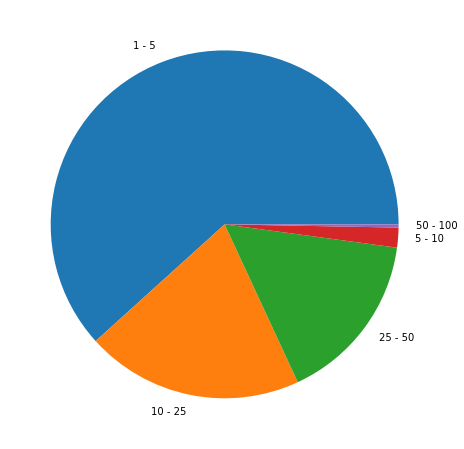

In [9]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Job_Salary'].value_counts(),labels=["1 - 5","10 - 25","25 - 50","5 - 10","50 - 100"])
plt.show()

In [10]:

class_0  = df[df['Job_Salary']==0]
class_1   = df[df['Job_Salary']==1]
class_2  = df[df['Job_Salary']==2]
class_3   = df[df['Job_Salary']==3]
class_4  = df[df['Job_Salary']==4]

print('class_0  :',class_0.shape)
print('class_1  :',class_1.shape)
print('class_2  :',class_2.shape)
print('class_3  :',class_3.shape)
print('class_4  :',class_4.shape)


class_0  : (4178, 7)
class_1  : (1080, 7)
class_2  : (125, 7)
class_3  : (1368, 7)
class_4  : (20, 7)


In [11]:
class_1_over = class_1.sample(n=4178,random_state=15,replace=True)
class_2_over = class_2.sample(n=4178,random_state=15,replace=True)
class_3_over = class_3.sample(n=4178,random_state=15,replace=True)
class_4_over = class_4.sample(n=4178,random_state=15,replace=True)
final_data = pd.concat([class_1_over,class_2_over,class_3_over,class_4_over,class_0],axis=0)

In [12]:
df = final_data.drop(["Unnamed: 0"],axis =1)

In [13]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6191,Manager Process Planning,"surface treatment, Method Engineering, Machin...",Mumbai,"Production,Manufacturing,Maintenance,Productio...",5,1
5930,Technical Application Support (with SQL & Java),"Java, Stored Procedures, Technical Support, A...",Bengaluru,"Admin,Maintenance,Security,Datawarehousing,IT ...",5,1
5702,Senior Associate- Merger and Accquisition-tax...,"ACQUISITION, taxation, MERGER",Gurgaon,"Senior Management,Accounts , Finance , Tax , C...",5,1
6213,Commercial Manager,commercial management,Chennai,"Purchase,Material Management,Purchase , Logist...",5,1
5631,Company Secretary For Pitampura,"Company Secretary, Secretarial Activities, Ch...",Delhi NCR,"Senior Management,Accounts , Finance , Tax , C...",0,1
...,...,...,...,...,...,...
4173,Business Development Manager & BDO - All Indi...,"area manager, Sales & Distribution, business ...","Delhi NCR,Bengaluru,Ludhiana","Channel Sales,Sales , Retail , Business Develo...",2,0
4174,Urgent Walk Ins For Sales Executive - Kolkata...,"insurance, pharma sales, auto sales, business...","Kolkata,Guwahati,Ranchi","Retail Sales,Sales , Retail , Business Develop...",2,0
4175,"Highway Engineer, Highway Design Engineer, Br...","Bridge Design, Highway Design, Highway Engine...",Delhi NCR,"Site Engineering,Site Engineering , Project Ma...",3,0
4176,Job Opening ::raitan Pvt. Ltd. :: Accounts &a...,"accounts executive, admin assistant, administ...",Chennai,"Accounts,Accounts , Finance , Tax , Company Se...",3,0


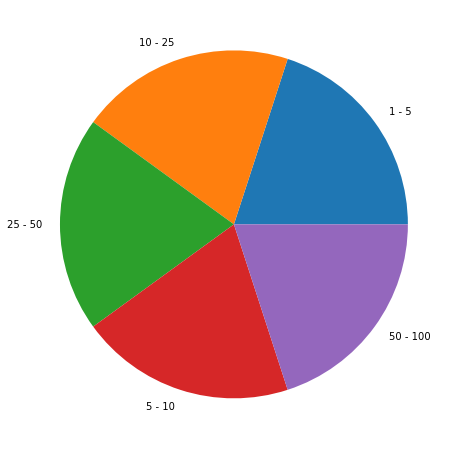

In [14]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Job_Salary'].value_counts(),labels=["1 - 5","10 - 25","25 - 50","5 - 10","50 - 100"])
plt.show()

In [15]:
df["Job_Title"] = df["Job_Title"].str.lower()
df["Key_Skills"] = df["Key_Skills"].str.lower()
df["Functional_Area_merged"] = df["Functional_Area_merged"].str.lower()
df["Location1"] = df["Location1"].str.lower()


In [16]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6191,manager process planning,"surface treatment, method engineering, machin...",mumbai,"production,manufacturing,maintenance,productio...",5,1
5930,technical application support (with sql & java),"java, stored procedures, technical support, a...",bengaluru,"admin,maintenance,security,datawarehousing,it ...",5,1
5702,senior associate- merger and accquisition-tax...,"acquisition, taxation, merger",gurgaon,"senior management,accounts , finance , tax , c...",5,1
6213,commercial manager,commercial management,chennai,"purchase,material management,purchase , logist...",5,1
5631,company secretary for pitampura,"company secretary, secretarial activities, ch...",delhi ncr,"senior management,accounts , finance , tax , c...",0,1
...,...,...,...,...,...,...
4173,business development manager & bdo - all indi...,"area manager, sales & distribution, business ...","delhi ncr,bengaluru,ludhiana","channel sales,sales , retail , business develo...",2,0
4174,urgent walk ins for sales executive - kolkata...,"insurance, pharma sales, auto sales, business...","kolkata,guwahati,ranchi","retail sales,sales , retail , business develop...",2,0
4175,"highway engineer, highway design engineer, br...","bridge design, highway design, highway engine...",delhi ncr,"site engineering,site engineering , project ma...",3,0
4176,job opening ::raitan pvt. ltd. :: accounts &a...,"accounts executive, admin assistant, administ...",chennai,"accounts,accounts , finance , tax , company se...",3,0


In [17]:
df.describe()

,Job_Experience,Job_Salary
count,20890.000000,20890.000000
mean,2.204548,2.000000
std,2.006440,1.414247
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,2.000000
75%,5.000000,3.000000
max,5.000000,4.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20890 entries, 6191 to 4177
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job_Title               20890 non-null  object
 1   Key_Skills              20890 non-null  object
 2   Location1               20890 non-null  object
 3   Functional_Area_merged  20890 non-null  object
 4   Job_Experience          20890 non-null  int32 
 5   Job_Salary              20890 non-null  int32 
dtypes: int32(2), object(4)
memory usage: 979.2+ KB


Tokenization of Data

In [19]:
# from nltk.tokenize import word_tokenize

def word_tok(data):
    tokens = re.findall("[\w']+", data)
#     print(tokens)
    return tokens

Removal of Stopwords

In [20]:
def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
#     print(new_list)
    return new_list

Removal of Punctuation Symbols

In [21]:
def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list

Removal of Numbers

In [22]:
def remove_number(data):
    no_digit_list = []
    new_list = []
    
    for i in data:
        for j in s.digits:
            i = i.replace(j,'')
        no_digit_list.append(i)
    
    for i in no_digit_list:
        if i!='':
            new_list.append(i)
    return new_list

Lemmatization of Data

In [23]:
def lemmatization(data):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    roots = [lemmatizer.lemmatize(i) for i in data]
    return roots

In [24]:
# Job Title
df["Job_Title"] = df["Job_Title"].apply(word_tok)
df["Job_Title"] = df["Job_Title"].apply(remove_stopwords)
df["Job_Title"] = df["Job_Title"].apply(remove_punctuations)
df["Job_Title"] = df["Job_Title"].apply(remove_number)
df["Job_Title"] = df["Job_Title"].apply(lemmatization)

In [25]:
df['Job_Title'] = [' '.join(map(str,l)) for l in df['Job_Title']] 

In [26]:
# Key Skills
df["Key_Skills"] = df["Key_Skills"].apply(word_tok)
df["Key_Skills"] = df["Key_Skills"].apply(remove_stopwords)
df["Key_Skills"] = df["Key_Skills"].apply(remove_punctuations)
df["Key_Skills"] = df["Key_Skills"].apply(remove_number)
df["Key_Skills"] = df["Key_Skills"].apply(lemmatization)

In [27]:
df['Key_Skills'] = [' '.join(map(str,l)) for l in df['Key_Skills']] 

In [28]:
# Role Category
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(word_tok)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_stopwords)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_punctuations)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(remove_number)
df["Functional_Area_merged"] = df["Functional_Area_merged"].apply(lemmatization)

In [29]:
df['Functional_Area_merged'] = [' '.join(map(str,l)) for l in df['Functional_Area_merged']] 

In [30]:
# Location
df["Location1"] = df["Location1"].apply(word_tok)
df["Location1"] = df["Location1"].apply(remove_stopwords)
df["Location1"] = df["Location1"].apply(remove_punctuations)
df["Location1"] = df["Location1"].apply(remove_number)
df["Location1"] = df["Location1"].apply(lemmatization)

In [31]:
df['Location1'] = [' '.join(map(str,l)) for l in df['Location1']] 

In [32]:
df

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience,Job_Salary
6191,manager process planning,surface treatment method engineering machining...,mumbai,production manufacturing maintenance productio...,5,1
5930,technical application support sql java,java stored procedure technical support applic...,bengaluru,admin maintenance security datawarehousing sof...,5,1
5702,senior associate merger accquisition taxation,acquisition taxation merger,gurgaon,senior management account finance tax company ...,5,1
6213,commercial manager,commercial management,chennai,purchase material management purchase logistic...,5,1
5631,company secretary pitampura,company secretary secretarial activity charter...,delhi ncr,senior management account finance tax company ...,0,1
...,...,...,...,...,...,...
4173,business development manager bdo india vacancy,area manager sale distribution business manage...,delhi ncr bengaluru ludhiana,channel sale sale retail business development ...,2,0
4174,urgent walk in sale executive kolkata bhubnesh...,insurance pharma sale auto sale business devel...,kolkata guwahati ranchi,retail sale sale retail business development i...,2,0
4175,highway engineer highway design engineer bridg...,bridge design highway design highway engineeri...,delhi ncr,site engineering site engineering project mana...,3,0
4176,job opening raitan pvt ltd account admin ex ch...,account executive admin assistant administrati...,chennai,account account finance tax company secretary ...,3,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20890 entries, 6191 to 4177
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job_Title               20890 non-null  object
 1   Key_Skills              20890 non-null  object
 2   Location1               20890 non-null  object
 3   Functional_Area_merged  20890 non-null  object
 4   Job_Experience          20890 non-null  int32 
 5   Job_Salary              20890 non-null  int32 
dtypes: int32(2), object(4)
memory usage: 979.2+ KB


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
x_train = df.drop(["Job_Salary"],axis =1)

In [36]:
x_train

,Job_Title,Key_Skills,Location1,Functional_Area_merged,Job_Experience
6191,manager process planning,surface treatment method engineering machining...,mumbai,production manufacturing maintenance productio...,5
5930,technical application support sql java,java stored procedure technical support applic...,bengaluru,admin maintenance security datawarehousing sof...,5
5702,senior associate merger accquisition taxation,acquisition taxation merger,gurgaon,senior management account finance tax company ...,5
6213,commercial manager,commercial management,chennai,purchase material management purchase logistic...,5
5631,company secretary pitampura,company secretary secretarial activity charter...,delhi ncr,senior management account finance tax company ...,0
...,...,...,...,...,...
4173,business development manager bdo india vacancy,area manager sale distribution business manage...,delhi ncr bengaluru ludhiana,channel sale sale retail business development ...,2
4174,urgent walk in sale executive kolkata bhubnesh...,insurance pharma sale auto sale business devel...,kolkata guwahati ranchi,retail sale sale retail business development i...,2
4175,highway engineer highway design engineer bridg...,bridge design highway design highway engineeri...,delhi ncr,site engineering site engineering project mana...,3
4176,job opening raitan pvt ltd account admin ex ch...,account executive admin assistant administrati...,chennai,account account finance tax company secretary ...,3


In [37]:
y_train = df["Job_Salary"].astype(int)

In [38]:
y_train

6191    1
5930    1
5702    1
6213    1
5631    1
       ..
4173    0
4174    0
4175    0
4176    0
4177    0
Name: Job_Salary, Length: 20890, dtype: int32

In [39]:
y_train = pd.DataFrame(y_train)
y_train

,Job_Salary
6191,1
5930,1
5702,1
6213,1
5631,1
...,...
4173,0
4174,0
4175,0
4176,0


In [40]:
tfidf = TfidfVectorizer()


In [41]:
tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Job_Title = tfidf.fit_transform(x_train["Job_Title"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Key_Skills = tfidf.fit_transform(x_train["Key_Skills"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Functional_Area_merged = tfidf.fit_transform(x_train["Functional_Area_merged"].tolist())

tfidf = TfidfVectorizer(max_features = 500, 
                              ngram_range = (1,3),
                              stop_words = "english")
X_Location1 = tfidf.fit_transform(x_train["Location1"].tolist())



In [42]:
import scipy
X = scipy.sparse.hstack((X_Job_Title, 
                         X_Key_Skills,
                         X_Functional_Area_merged,
                         X_Location1,
                        x_train[["Job_Experience"]].to_numpy())).tocsr()

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y_train,test_size = 0.33, random_state = 1)

In [44]:
X_train.shape

(13996, 2001)

In [45]:
Y_train.shape

(13996, 1)

In [46]:
X_test.shape

(6894, 2001)

In [47]:
Y_test.shape

(6894, 1)

These are the models we are testing for our prediction
1. LogisticRegression
2.DecisionTreeClassifier
3.RandomForestClassifier
4.AdaBoostClassifier
5.GradientBoostingClassifier
6.XGBClassifier
7.LGBMClassifier
8.KNeighborsClassifier


1. LogisticRegression

In [48]:
%%time
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

CPU times: total: 6.94 s
Wall time: 1.86 s


LogisticRegression()

In [49]:
logistic_pred_train = logistic_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,logistic_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,logistic_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,logistic_pred_train))
print('Classification Report          :\n',classification_report(Y_train,logistic_pred_train))

Accuracy Score                 : 0.872
Precision Score                : 0.872
Recall Score                   : 0.872
Confusion Matrix               :
 [[2396   99   24  307    1]
 [  66 2255   71  372    0]
 [   0    0 2782   23    0]
 [ 336  445   46 1947    2]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      2827
           1       0.81      0.82      0.81      2764
           2       0.95      0.99      0.97      2805
           3       0.73      0.70      0.72      2776
           4       1.00      1.00      1.00      2824

    accuracy                           0.87     13996
   macro avg       0.87      0.87      0.87     13996
weighted avg       0.87      0.87      0.87     13996



In [50]:
logistic_pred_test = logistic_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,logistic_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,logistic_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,logistic_pred_test))
print('Classification Report          :\n',classification_report(Y_test,logistic_pred_test))

Accuracy Score                 : 0.8374
Precision Score                : 0.8374
Recall Score                   : 0.8374
Confusion Matrix               :
 [[1086   55   15  195    0]
 [  46 1074   53  238    3]
 [   0    0 1364    9    0]
 [ 185  292   27  895    3]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1351
           1       0.76      0.76      0.76      1414
           2       0.93      0.99      0.96      1373
           3       0.67      0.64      0.65      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.84      6894
   macro avg       0.84      0.84      0.84      6894
weighted avg       0.83      0.84      0.84      6894



2.DecisionTreeClassifier

In [51]:
%%time
dt_model = DecisionTreeClassifier(random_state=15,max_depth=57)
dt_model.fit(X_train,Y_train)

CPU times: total: 1.66 s
Wall time: 1.61 s


DecisionTreeClassifier(max_depth=57, random_state=15)

In [52]:
dt_pred_train = dt_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,dt_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,dt_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,dt_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,dt_pred_train))
print('Classification Report          :\n',classification_report(Y_train,dt_pred_train))


Accuracy Score                 : 0.9901
Precision Score                : 0.9901
Recall Score                   : 0.9901
Confusion Matrix               :
 [[2775    1    0   51    0]
 [   2 2744    0   18    0]
 [   0    0 2805    0    0]
 [  48   18    0 2710    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2827
           1       0.99      0.99      0.99      2764
           2       1.00      1.00      1.00      2805
           3       0.98      0.98      0.98      2776
           4       1.00      1.00      1.00      2824

    accuracy                           0.99     13996
   macro avg       0.99      0.99      0.99     13996
weighted avg       0.99      0.99      0.99     13996



In [53]:
dt_pred_test = dt_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,dt_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,dt_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,dt_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,dt_pred_test))
print('Classification Report          :\n',classification_report(Y_test,dt_pred_test))

Accuracy Score                 : 0.9296
Precision Score                : 0.9296
Recall Score                   : 0.9296
Confusion Matrix               :
 [[1094   57    5  195    0]
 [   7 1337   10   60    0]
 [   0    0 1373    0    0]
 [  84   65    2 1251    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1351
           1       0.92      0.95      0.93      1414
           2       0.99      1.00      0.99      1373
           3       0.83      0.89      0.86      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.93      6894
   macro avg       0.93      0.93      0.93      6894
weighted avg       0.93      0.93      0.93      6894



3. RandomForestClassifier

In [54]:
%%time
rf_model = RandomForestClassifier(random_state=15,max_depth=57)
rf_model.fit(X_train,Y_train)

CPU times: total: 10.3 s
Wall time: 10.3 s


RandomForestClassifier(max_depth=57, random_state=15)

In [55]:
rf_pred_train = rf_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,rf_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,rf_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,rf_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,rf_pred_train))
print('Classification Report          :\n',classification_report(Y_train,rf_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9979
Recall Score                   : 0.9979
Confusion Matrix               :
 [[2818    2    0    7    0]
 [   0 2763    0    1    0]
 [   0    0 2805    0    0]
 [  13    6    0 2757    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2827
           1       1.00      1.00      1.00      2764
           2       1.00      1.00      1.00      2805
           3       1.00      0.99      1.00      2776
           4       1.00      1.00      1.00      2824

    accuracy                           1.00     13996
   macro avg       1.00      1.00      1.00     13996
weighted avg       1.00      1.00      1.00     13996



In [56]:
rf_pred_test = rf_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,rf_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,rf_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,rf_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,rf_pred_test))
print('Classification Report          :\n',classification_report(Y_test,rf_pred_test))

Accuracy Score                 : 0.9472
Precision Score                : 0.9472
Recall Score                   : 0.9472
Confusion Matrix               :
 [[1142   37    0  172    0]
 [   4 1367    1   42    0]
 [   0    0 1373    0    0]
 [  48   60    0 1294    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1351
           1       0.93      0.97      0.95      1414
           2       1.00      1.00      1.00      1373
           3       0.86      0.92      0.89      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.95      6894
   macro avg       0.95      0.95      0.95      6894
weighted avg       0.95      0.95      0.95      6894



4. AdaBoostClassifier

In [57]:
%%time
adaboost_model = AdaBoostClassifier(random_state=15)
adaboost_model.fit(X_train,Y_train)

CPU times: total: 2.44 s
Wall time: 2.44 s


AdaBoostClassifier(random_state=15)

In [58]:
adaboost_pred_train = adaboost_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,adaboost_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,adaboost_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,adaboost_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,adaboost_pred_train))
print('Classification Report          :\n',classification_report(Y_train,adaboost_pred_train))

Accuracy Score                 : 0.4841
Precision Score                : 0.4841
Recall Score                   : 0.4841
Confusion Matrix               :
 [[ 463  146   14 2204    0]
 [ 188 1511  696  269  100]
 [ 115  405 1893   98  294]
 [ 415 1201  106 1040   14]
 [   0    0  956    0 1868]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.39      0.16      0.23      2827
           1       0.46      0.55      0.50      2764
           2       0.52      0.67      0.59      2805
           3       0.29      0.37      0.33      2776
           4       0.82      0.66      0.73      2824

    accuracy                           0.48     13996
   macro avg       0.50      0.48      0.48     13996
weighted avg       0.50      0.48      0.48     13996



In [59]:
adaboost_pred_test = adaboost_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,adaboost_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,adaboost_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,adaboost_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,adaboost_pred_test))
print('Classification Report          :\n',classification_report(Y_test,adaboost_pred_test))

Accuracy Score                 : 0.4751
Precision Score                : 0.4751
Recall Score                   : 0.4751
Confusion Matrix               :
 [[ 205   91   11 1043    1]
 [  90  768  347  161   48]
 [  42  214  912   58  147]
 [ 194  665   44  491    8]
 [   0    0  455    0  899]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.39      0.15      0.22      1351
           1       0.44      0.54      0.49      1414
           2       0.52      0.66      0.58      1373
           3       0.28      0.35      0.31      1402
           4       0.82      0.66      0.73      1354

    accuracy                           0.48      6894
   macro avg       0.49      0.47      0.47      6894
weighted avg       0.49      0.48      0.47      6894



5. GradientBoostingClassifier

In [60]:
%%time
gradient_model = GradientBoostingClassifier(random_state=15)
gradient_model.fit(X_train,Y_train)

CPU times: total: 41.7 s
Wall time: 41.7 s


GradientBoostingClassifier(random_state=15)

In [61]:
gradient_pred_train = gradient_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,gradient_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,gradient_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,gradient_pred_train))
print('Classification Report          :\n',classification_report(Y_train,gradient_pred_train))

Accuracy Score                 : 0.8565
Precision Score                : 0.8565
Recall Score                   : 0.8565
Confusion Matrix               :
 [[2440   42    4  341    0]
 [  96 2010  223  425   10]
 [   0   23 2782    0    0]
 [ 438  352   54 1932    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2827
           1       0.83      0.73      0.77      2764
           2       0.91      0.99      0.95      2805
           3       0.72      0.70      0.71      2776
           4       1.00      1.00      1.00      2824

    accuracy                           0.86     13996
   macro avg       0.85      0.86      0.85     13996
weighted avg       0.85      0.86      0.85     13996



In [62]:
gradient_pred_test = gradient_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,gradient_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,gradient_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,gradient_pred_test))
print('Classification Report          :\n',classification_report(Y_test,gradient_pred_test))

Accuracy Score                 : 0.8225
Precision Score                : 0.8225
Recall Score                   : 0.8225
Confusion Matrix               :
 [[1118   33    3  197    0]
 [  71  957  117  263    6]
 [   0    9 1364    0    0]
 [ 263  227   35  877    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1351
           1       0.78      0.68      0.72      1414
           2       0.90      0.99      0.94      1373
           3       0.66      0.63      0.64      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.82      6894
   macro avg       0.82      0.82      0.82      6894
weighted avg       0.82      0.82      0.82      6894



6. XGBClassifier

In [63]:
%%time
xgb_model = XGBClassifier(max_depth=57,random_state=15)
xgb_model.fit(X_train,Y_train)

CPU times: total: 4min 42s
Wall time: 36.7 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=57, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=15, reg_alpha=0, ...)

In [64]:
xgb_pred_train = xgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,xgb_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,xgb_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,xgb_pred_train))
print('Classification Report          :\n',classification_report(Y_train,xgb_pred_train))

Accuracy Score                 : 0.9999
Precision Score                : 0.9999
Recall Score                   : 0.9999
Confusion Matrix               :
 [[2825    0    0    2    0]
 [   0 2764    0    0    0]
 [   0    0 2805    0    0]
 [   0    0    0 2776    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2827
           1       1.00      1.00      1.00      2764
           2       1.00      1.00      1.00      2805
           3       1.00      1.00      1.00      2776
           4       1.00      1.00      1.00      2824

    accuracy                           1.00     13996
   macro avg       1.00      1.00      1.00     13996
weighted avg       1.00      1.00      1.00     13996



In [65]:
xgb_pred_test = xgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,xgb_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,xgb_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,xgb_pred_test))
print('Classification Report          :\n',classification_report(Y_test,xgb_pred_test))

Accuracy Score                 : 0.9556
Precision Score                : 0.9556
Recall Score                   : 0.9556
Confusion Matrix               :
 [[1178   34    1  138    0]
 [   4 1369    2   39    0]
 [   0    0 1373    0    0]
 [  43   45    0 1314    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1351
           1       0.95      0.97      0.96      1414
           2       1.00      1.00      1.00      1373
           3       0.88      0.94      0.91      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.96      6894
   macro avg       0.96      0.96      0.96      6894
weighted avg       0.96      0.96      0.96      6894



7. LGBMClassifier

In [66]:
%%time
lgb_model      = LGBMClassifier(max_depth=57,random_state=15)
lgb_model.fit(X_train,Y_train)

CPU times: total: 52.2 s
Wall time: 7.61 s


LGBMClassifier(max_depth=57, random_state=15)

In [67]:
lgb_pred_train = lgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,lgb_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,lgb_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,lgb_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,lgb_pred_train))
print('Classification Report          :\n',classification_report(Y_train,lgb_pred_train))

Accuracy Score                 : 0.9877
Precision Score                : 0.9877
Recall Score                   : 0.9877
Confusion Matrix               :
 [[2746   16    0   65    0]
 [   1 2742    0   21    0]
 [   0    0 2805    0    0]
 [  43   26    0 2707    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2827
           1       0.98      0.99      0.99      2764
           2       1.00      1.00      1.00      2805
           3       0.97      0.98      0.97      2776
           4       1.00      1.00      1.00      2824

    accuracy                           0.99     13996
   macro avg       0.99      0.99      0.99     13996
weighted avg       0.99      0.99      0.99     13996



In [68]:
lgb_pred_test = lgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,lgb_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,lgb_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,lgb_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,lgb_pred_test))
print('Classification Report          :\n',classification_report(Y_test,lgb_pred_test))

Accuracy Score                 : 0.9414
Precision Score                : 0.9414
Recall Score                   : 0.9414
Confusion Matrix               :
 [[1142   36    1  172    0]
 [   0 1359    1   54    0]
 [   0    0 1373    0    0]
 [  75   65    0 1262    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1351
           1       0.93      0.96      0.95      1414
           2       1.00      1.00      1.00      1373
           3       0.85      0.90      0.87      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.94      6894
   macro avg       0.94      0.94      0.94      6894
weighted avg       0.94      0.94      0.94      6894



8. KNeighborsClassifier

In [69]:
%%time
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,Y_train)

CPU times: total: 62.5 ms
Wall time: 17 ms


KNeighborsClassifier()

In [70]:
knn_pred_train = knn_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(Y_train,knn_pred_train),4))
print('Precision Score                :',round(precision_score(Y_train,knn_pred_train,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_train,knn_pred_train,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_train,knn_pred_train))
print('Classification Report          :\n',classification_report(Y_train,knn_pred_train))

Accuracy Score                 : 0.9155
Precision Score                : 0.9155
Recall Score                   : 0.9155
Confusion Matrix               :
 [[2376  113    4  334    0]
 [  52 2538   45  126    3]
 [   0    0 2805    0    0]
 [ 219  277    9 2271    0]
 [   0    0    0    0 2824]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      2827
           1       0.87      0.92      0.89      2764
           2       0.98      1.00      0.99      2805
           3       0.83      0.82      0.82      2776
           4       1.00      1.00      1.00      2824

    accuracy                           0.92     13996
   macro avg       0.91      0.92      0.91     13996
weighted avg       0.92      0.92      0.92     13996



In [71]:
knn_pred_test = knn_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(Y_test,knn_pred_test),4))
print('Precision Score                :',round(precision_score(Y_test,knn_pred_test,average='micro'),4))
print('Recall Score                   :',round(recall_score(Y_test,knn_pred_test,average='micro'),4))
print('Confusion Matrix               :\n',confusion_matrix(Y_test,knn_pred_test))
print('Classification Report          :\n',classification_report(Y_test,knn_pred_test))

Accuracy Score                 : 0.8528
Precision Score                : 0.8528
Recall Score                   : 0.8528
Confusion Matrix               :
 [[1034   80    4  233    0]
 [  52 1179   43  138    2]
 [   0    0 1373    0    0]
 [ 198  257    8  939    0]
 [   0    0    0    0 1354]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.77      0.78      1351
           1       0.78      0.83      0.80      1414
           2       0.96      1.00      0.98      1373
           3       0.72      0.67      0.69      1402
           4       1.00      1.00      1.00      1354

    accuracy                           0.85      6894
   macro avg       0.85      0.85      0.85      6894
weighted avg       0.85      0.85      0.85      6894



Results Comparison

In [72]:
result_df = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','Addaboost','Gradient Boosting','Extreme Gradient Boosting','Light Gradient Boosting','K-Nearest Neighbor'],
                          'Training Accuracy':[0.872,0.9901,0.9979,0.4841,0.8565,0.9999,0.9877,0.9155],
                          'Test Accuracy':[0.8374,0.9296,0.9472,0.4751,0.8225,0.9556,0.9414,0.8528],
                          'Precision Score':[0.8374,0.9296,0.9472,0.4751,0.8225,0.9556,0.9414,0.8528],
                          'Recall Score':[0.8374,0.9296,0.9472,0.4751,0.8225,0.9556,0.9414,0.8528]})
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
0,Logistic Regression,0.8720,0.8374,0.8374,0.8374
1,Decision Tree,0.9901,0.9296,0.9296,0.9296
2,Random Forest,0.9979,0.9472,0.9472,0.9472
3,Addaboost,0.4841,0.4751,0.4751,0.4751
4,Gradient Boosting,0.8565,0.8225,0.8225,0.8225
5,Extreme Gradient Boosting,0.9999,0.9556,0.9556,0.9556
6,Light Gradient Boosting,0.9877,0.9414,0.9414,0.9414
7,K-Nearest Neighbor,0.9155,0.8528,0.8528,0.8528


In [73]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score
5,Extreme Gradient Boosting,0.9999,0.9556,0.9556,0.9556
2,Random Forest,0.9979,0.9472,0.9472,0.9472
6,Light Gradient Boosting,0.9877,0.9414,0.9414,0.9414
1,Decision Tree,0.9901,0.9296,0.9296,0.9296
7,K-Nearest Neighbor,0.9155,0.8528,0.8528,0.8528
0,Logistic Regression,0.8720,0.8374,0.8374,0.8374
4,Gradient Boosting,0.8565,0.8225,0.8225,0.8225
3,Addaboost,0.4841,0.4751,0.4751,0.4751


From above dataframe its clear that for XGBoost we got better accuracy as well as precision and recall score.